In [18]:
%load_ext autoreload
%autoreload 2
import sys
extra_path = "/Users/iraklis/Public/iraklis7_linrg"
if extra_path not in sys.path:
    sys.path.append(extra_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from pathlib import Path
import pandas as pd
import iraklis7_linrg.config as config
import iraklis7_linrg.plots as plots

### Load the data

In [20]:
features_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_FEATURES
labels_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_LABELS
plot_path: Path = config.FIGURES_DIR / config.FEATURES_PLOT

features = pd.DataFrame(config.read_data(features_path))
if features is None:
    raise ValueError("read_data failed - data is None")
labels = pd.DataFrame(config.read_data(labels_path))
if labels is None:
    raise ValueError("read_data failed - data is None")

print(features.to_string())

     Κωδικός Συστήματος   Εμβαδόν    Όροφος  Σύνολο ορόφων   Ασανσέρ       Θέα  Έτος κατασκευής  Έτος ανακαίνισης  Όροφος Ρετιρέ    Ηλικία  Κατάσταση  Ασανσέρ από 3ο
0             -0.199786  0.479710 -1.321908      -0.642455  0.325222  0.607493         0.238054          0.399042      -0.402015  0.718692   1.247554       -1.343457
1             -0.451020 -0.782906 -0.846847            NaN  0.325222  0.607493        -0.224027               NaN      -0.402015 -0.636219  -0.831703       -1.343457
2              0.208021  0.576834  1.528456       1.047290  0.325222  0.607493        -0.316443         -1.581569       2.487469 -0.636219  -0.831703        0.744348
3              0.514304 -0.151598  1.053395            NaN  0.325222  0.607493         1.901545               NaN      -0.402015  2.073604   1.247554        0.744348
4              0.251868 -0.734344  0.578335       1.047290  0.325222  0.607493        -0.501275               NaN      -0.402015 -0.636219  -0.831703        0.744348
5   

### Visualize features and labels

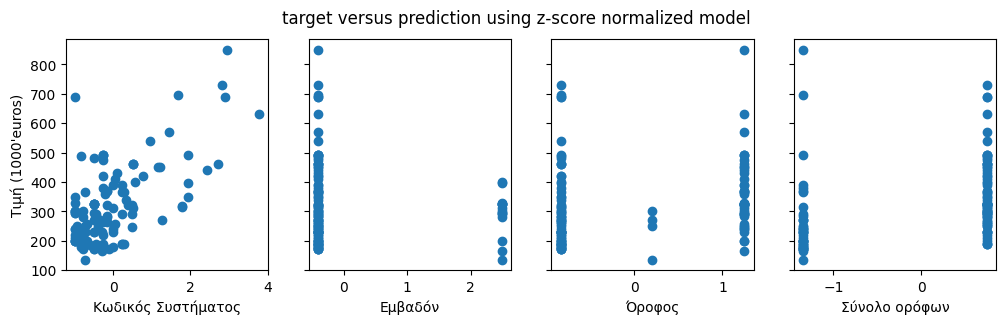

,Εμβαδόν,Όροφος Ρετιρέ,Κατάσταση,Ασανσέρ από 3ο
0,0.479710,-0.402015,1.247554,-1.343457
1,-0.782906,-0.402015,-0.831703,-1.343457
2,0.576834,2.487469,-0.831703,0.744348
3,-0.151598,-0.402015,1.247554,0.744348
4,-0.734344,-0.402015,-0.831703,0.744348


In [ ]:
features_sel = features[['Εμβαδόν', 'Όροφος Ρετιρέ', 'Κατάσταση', 'Ασανσέρ από 3ο']]
plots.gen(list(features), features_sel.to_numpy(), labels, None, None, None, plot_path, True)

features_sel.head()